# Mastermind (15pts)

by [Dipsy](https://github.com/dipsywong98)

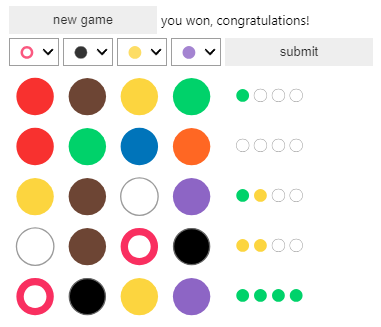

https://mastermindgame.org/

## Introduction

Mastermind is an interesting game, why not we make it?

In this Jupyter Notebook, we will guide you to build all the essential parts in a mastermind game and assemble all the parts, and at last, we will have our playable mastermind game!

## Step 0 - Utility functions

First, we need to initialize the following utility functions to help us run tests - to ensure we implement our logic correctly!

We implemented some of them for you, and you may study their internal logic if you are interested.

The rest are left as an exercise.

In [1]:
from utils import (
    FreezedParam, grade_test, grade_tests
)
import unittest

### is_unique

 - return True when the elements in the given array are unique, if there are duplicates, return False
 - for example, [1, 2, 3, 4] should return True, [1, 2, 3, 1] should return False

In [5]:
def is_unique(array):
    # your implementation here
    unique = set(array)
    if len(unique) == len(array):
        return True
    return False

class TestIsUnique(unittest.TestCase):
    def test_return_true_if_unique(self):
        with FreezedParam([1, 2, 3, 4]) as array:
            self.assertTrue(is_unique(array))

    def test_return_false_if_not_unique(self):
        with FreezedParam([1, 2, 3, 1]) as array:
            self.assertFalse(is_unique(array))

grade_test(TestIsUnique)

----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK


Score of TestIsUnique: 2/2 (100%)


### random_unique

- return an array of the given length, where each element should be a single-digit integer, and unique

In [10]:
from random import randint

def random_unique(length):
    # your implementation
    result = set()
    while len(result) < length:
        result.add(randint(0, 9))
    return result

class TestRandomUnique(unittest.TestCase):
    def test_should_return_array_of_given_length(self):
        self.assertEqual(len(random_unique(4)), 4)

    def test_should_return_integers_0_to_9(self):
        self.assertTrue(all((it in range(10)) for it in random_unique(4)))

    def test_should_return_unique_values(self):
        self.assertTrue(is_unique(random_unique(4)))

grade_test(TestRandomUnique)

----------------------------------------------------------------------
Ran 3 tests in 0.000s

OK


Score of TestRandomUnique: 3/3 (100%)


## Step 1 - implement the `calculate_green` function

The green value is the number of truth digits equal to the guess digits on the corresponding position. (Yes each color is represented by a digit from 0 to 9) You can expect truth digits to be unique, but the guess may not.

So for example:

```
guess: 0, 2, 3, 4
truth: 1, 2, 3, 4
expect: 3, because 2, 3, 4 are the matching digits


guess: 0, 2, 3, 4
truth: 3, 2, 0, 4
expect: 2, because 2, 4 has the same digit at the corresponding position in guess. although 0, 3 exist in both guess and truth, their positions are not matching

guess: 4, 3, 2, 1
truth: 1, 2, 3, 4
expect: 0

guess: 1, 1, 2, 2
truth: 1, 2, 3, 4
expect: 1, because only one 1 has a 1 at the same position in guess
```

In [ ]:
def calculate_green(guess, truth):
    # your implementation to return the correct green value
    return 0

class TestCalculateGreen(unittest.TestCase):
    def test_case1(self):
        with FreezedParam(([0, 2, 3, 4], [1, 2, 3, 4])) as (guess, truth):
            self.assertEqual(calculate_green(guess, truth), 3)

    def test_case2(self):
        with FreezedParam(([0, 2, 3, 4], [3, 2, 0, 4])) as (guess, truth):
            self.assertEqual(calculate_green(guess, truth), 2)

    def test_case3(self):
        with FreezedParam(([4, 3, 2, 1], [1, 2, 3, 4])) as (guess, truth):
            self.assertEqual(calculate_green(guess, truth), 0)

    def test_case4(self):
        with FreezedParam(([1, 1, 2, 2], [1, 2, 3, 4])) as (guess, truth):
            self.assertEqual(calculate_green(guess, truth), 1)

    def test_case5(self):
        with FreezedParam(([1, 0, 2, 2], [1, 2, 3, 4])) as (guess, truth):
            self.assertEqual(calculate_green(guess, truth), 1)


grade_test(TestCalculateGreen)  


## Step 2 - implement the `calculate_yellow` function

The yellow value is the number of truth digits that exist in the guess digits, but not in the corresponding position. You can expect truth digits to be unique

So for example:

```
guess: 0, 2, 3, 4
truth: 1, 2, 3, 4
expect: 0, because 2, 3, 4 are matched in their corresponding position


guess: 0, 2, 3, 4
truth: 3, 2, 0, 5
expect: 2, because 2 is matched on its corresponding position. 0, 3 exist in both guess and truth, and their positions are not matching

guess: 4, 3, 2, 1
truth: 1, 2, 3, 4
expect: 4

guess: 1, 1, 2, 2
truth: 1, 2, 3, 4
expect: 1, because 1 has a 1 at the same position in guess, it does not count to the yellow value. but 2 exist in guess not at the same position
```

In [ ]:
def calculate_yellow(guess, truth):
    # your implementation to return the correct yellow value
    return 0


class TestCalculateYellow(unittest.TestCase):
    def test_case1(self):
        with FreezedParam(([0, 2, 3, 4], [1, 2, 3, 4])) as (guess, truth):
            self.assertEqual(calculate_yellow(guess, truth), 0)

    def test_case2(self):
        with FreezedParam(([0, 2, 3, 4], [3, 2, 0, 5])) as (guess, truth):
            self.assertEqual(calculate_yellow(guess, truth), 2)

    def test_case3(self):
        with FreezedParam(([4, 3, 2, 1], [1, 2, 3, 4])) as (guess, truth):
            self.assertEqual(calculate_yellow(guess, truth), 4)

    def test_case4(self):
        with FreezedParam(([1, 1, 2, 2], [1, 2, 3, 4])) as (guess, truth):
            self.assertEqual(calculate_yellow(guess, truth), 1)

grade_test(TestCalculateYellow)  

## Step 3 - preparation work to play mastermind

Our mastermind game depends on some external dependency, let's run the below cell to install

In [ ]:
try:
    import ipywidgets
except:
    try:
        import micropip

        await micropip.install('ipywidgets')

        import ipywidgets
    except:
        !pip install ipywidgets
        import ipywidgets

## Step 4 - Let's play mastermind

We have built a mastermind UI for you, run the below cell and play!

In [ ]:
from ui_mastermind import start_game

start_game(calculate_green, calculate_yellow, random_unique)

## Step 5 - Let's see how much score you get on this question

In [ ]:
grade_tests([
    TestIsUnique,
    TestRandomUnique,
    TestCalculateGreen,
    TestCalculateYellow
])

## Take home exercises

Some challenging questions that you may attempt if you are interested (do not contribute to your team's score in the contest)

1. Can you extend the game to support duplicated digits? For example, 1, 1, 3, 3 can be valid truth digits?

2. Can you extend the game to support a higher digit length? For example, the truth length can be 6.